<h1><center>Project: Test A Perceptual Phenomenon</center></h1>
<h2>Project Overview</h2>
  <p>
  In this project, you will investigate a classic phenomenon from experimental psychology called the 
  [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect). You will learn a little bit about the experiment, create
  a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some 
  data collected from others who have performed the same task and will compute some statistics describing the results. 
  Finally, you will interpret your results in terms of your hypotheses.
  </p>
<h2>Why this project?</h2>
   <p> 
   Statistics is a major component of data analysis, it allows you to investigate data and make inferences based on 
   your observations. A foundation in statistics also allows you to be a consumer of analyses that others perform, 
   and allows you to relate to the conclusions others have drawn from their investigations.
   </p>
<h2>What will I Learn?</h2>
   <p>
   This project will review the basic concepts of statistics, including:
     <li> How to identify components of an experiment</li>
     <li> How to use descriptive statistics to describe qualities of a sample</li>
     <li> How to set up a hypothesis test, make inferences from a sample, and draw conclusions based on the results</li>
   </p>
   
<h1 style="color:blue;">Statistics: The Science Of Decisions</h1>
<h2 style="color:blue;">Project Instructions</h2>
   
<h3 style="color:blue;">Background Information</h3>
       <p> 
       In a Stroop task, participants are presented with a list of words, with each word displayed in a color of 
       ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has 
       two conditions: a congruent words condition, and an incongruent words condition. In the congruent words 
       condition, the words being displayed are color words whose names match the colors in which they are printed: 
       for example <span style="color: red">RED</span>, <span style="color: blue">BLUE</span>. In the incongruent 
       words condition, the words displayed are color words whose names do not match the colors in which they are 
       printed: for example <span style="color: green">PURPLE</span>, <span style="color: blue">ORANGE</span>. In 
       each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will 
       go through and record a time from each condition.
       </p>
       
**Congruent Condition**:
  ![alt text](https://faculty.washington.edu/chudler/java/stroopa.gif)
**Incongruent Condition**:
  ![alt text](https://faculty.washington.edu/chudler/java/stroopb.gif)
  
  <p>
  Now it’s your chance to try out the Stroop task for yourself. Go to 
  [this link](https://faculty.washington.edu/chudler/java/ready.html), which has a Java-based applet for performing 
  the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) 
  Now, download [this dataset](stroopdata.csv) which contains results from a number of participants in the task. Each row 
  of the dataset contains the performance for one participant, with the first number their results on the congruent task and 
  the second number their performance on the incongruent task.
  </p>
  

In [2]:
import numpy as np # use for calculate statistics
import pandas as pd # use for import dataset and calculate statistics
import seaborn as sns # use for statistical visualizations
import matplotlib.pyplot as plt # use for basic plots

In [4]:
# import the csv file
df = pd.read_csv('stroopdata.csv')
print('sample size n ={}'.format(len(df)))
df

sample size n =24


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Dataframe have two column Congruent and Incongruent, these two are the conditions of the stroop test and observations in theses columns are time taken(in second) to read the words in each situation.

**Question 1**. ***What is our independent variable? What is our dependent variable?***

**Answer**.

>***Independent*** variable: Congruent and Incongruent conditions

>***Dependent*** variable: time taken to read the words in same list of these conditions


**Question 2**. ***What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.***

**Answer**: 

>***Null Hupothesis***  There is no change in time taken to read the  words in both conditions.

>$H_0$ : $\mu_i - \mu_c$ = 0

>***Alternative Hypothesis*** There is some change in time taken to read the words in both conditions.

>$H_A$ :$\mu_i - \mu_c \neq 0$

**here**: 
>$\mu_i$ --> average time taken to read the words in **`Incongruent`** condition

>$\mu_c$ --> average time taken to read the words in **`Congruent`** condition

>sample size $n = 24$


Here we dont know about the population parameter like standard daviation ($\sigma$), so i can't use here z-test.


The paired t-test calculates the difference within each before-and-after pair of measurements, determines the mean of these changes, and reports whether this mean of the differences is statistically significant.both the sample are normaly distributed which is shown below in visualization. and the difference of the both the condition also normally distributed but here the sample size is less so its not look like a perfect normally distributed. both the conditions are affect the each other, both the sample are dependent, because when a person first read the words in congruent condition and after that same person read the words in incongruent condition, person can get little confused. so we can say both the sample are dependent. 
Assumption is that the samples are taken randomly and difference time in both the condition are normaly distributed.

so, Here i will perform ***Dependent t-test for pair sample*** because here one person having two conditions `congruent` and `incongruent`, so it is a Dependent t-test type of problem.
I will use **two tailed t-test** at alpha level $\alpha = 0.05$, because distribution of difference is normal distribution and we want to know only there is significant difference or not, so we take both the condition either positive or negative direction. 


### Important Formula's used in this notebook ###
> mean $$\mu_D = \sum_{i=1}^n \frac{1}{n}x_i$$
> sample standard daviation $$ SD_D = \sqrt\frac{\sum_{1=1}^n {(x_i - \mu_D)^2}}{n-1}$$
> degree of freedom $$df = (n-1)$$
> Standard Error $$SE= \frac{SD_D}{\sqrt n}$$
> t-statistics $$t = \frac{\mu_i - \mu_c}{SE}$$

**Question 3**.  ***Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.***

**Answer**:
>sample size $n=24$,
>  degree of freedom $df = 23$
 
> $\mu_c = 14.051$,
> $ \mu_i = 22.016$,
> $ \mu_D = 7.965$,
> $ SD_D = 4.865$



In [104]:
#sample size and degree of freedom
n = len(df) #sample size
dof = n-1 # degree of freedom
print('sample size n = {}\ndegree of freedom dof = {}'.format(n,dof))

sample size n = 24
degree of freedom dof = 23


In [101]:
# find the average time taken to read the words in both condition
mu_c = df['Congruent'].mean() 
mu_c =round(mu_c,3) # round up the mean up to 3 decimal

mu_i = df['Incongruent'].mean()
mu_i = round(mu_i,3)

print('average time for Congruent: {}\naverage time for Incongruent: {}'.format(mu_c, mu_i))

average time for Congruent: 14.051
average time for Incongruent: 22.016


In [9]:
#find the difference and calculate the mean
df['Difference'] = df['Incongruent'] - df['Congruent']
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [16]:
# mean of difference and standard daviation of differences
mu_D = df['Difference'].mean()
mu_D = round(mu_D,3)

SD_D = df['Difference'].std()
SD_D = round(SD_D,3)
print('mean of difference: {}\nStandard Daviation of difference: {}'.format(mu_D, SD_D))

mean of difference: 7.965
Standard Daviation of difference: 4.865


**Question 4**. ***ovide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.***

**Answer**:

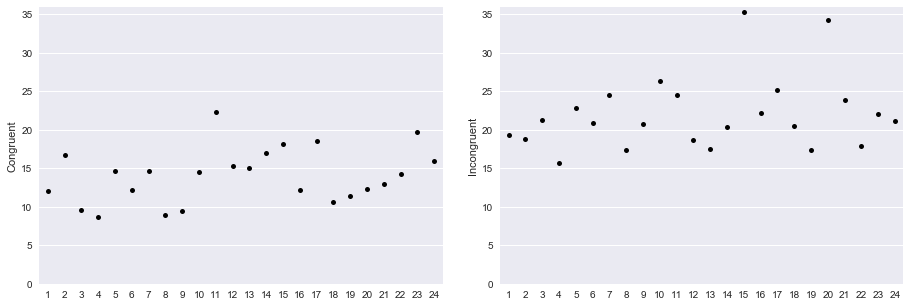

In [71]:
# scatter plot 
plt.axes([0,0.7,0.7,0.7])
sns.stripplot(df.index+1, 'Congruent', data = df, color ='black')
plt.ylim(0,36)

plt.axes([0.8,0.7,0.7,0.7])
sns.stripplot(df.index+1, 'Incongruent', data = df, color ='black')
plt.ylim(0,36)

plt.show()


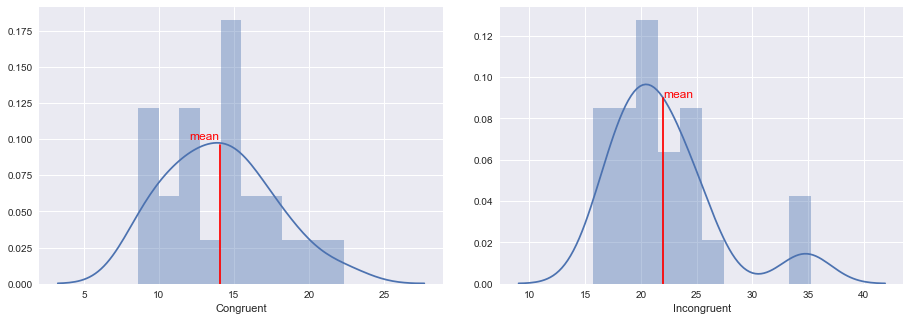

In [60]:
# histogram
plt.axes([0,0.7,0.7,0.7])
sns.distplot(df['Congruent'], bins = 10)
plt.axvline(df['Congruent'].mean(), color = 'red', ymin = 0, ymax= 0.5)
plt.text(12,0.100, 'mean', color='red')

plt.axes([0.8,0.7,0.7,0.7])
sns.distplot(df['Incongruent'], bins = 10)
plt.axvline(df['Incongruent'].mean(), color = 'red', ymin = 0, ymax = 0.67)
plt.text(22, 0.09, 'mean', color='red')
plt.show()

> In both the conditions `Congruent` and `Incongruent` sample are **normaly distributed**, and in this plot, red line shows the mean value. we can see from these plots that the spread is more for Congruent condition

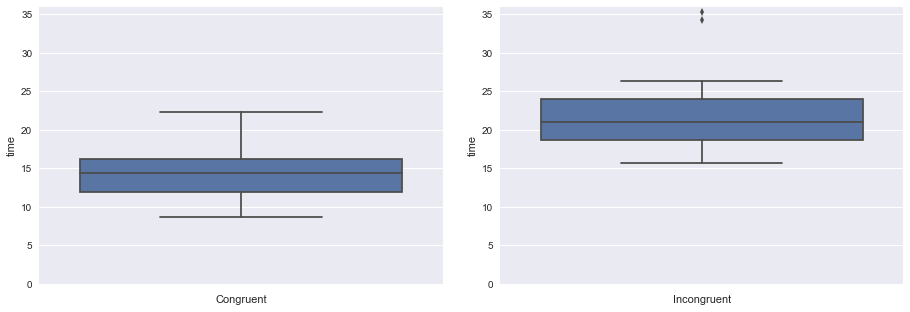

In [72]:
# boxplot
plt.axes([0,0.7,0.7,0.7])
sns.boxplot('Congruent', data = df, orient = 'v')
plt.xlabel('Congruent')
plt.ylabel('time')
plt.ylim(0,36)
plt.axes([0.8,0.7,0.7,0.7])
sns.boxplot('Incongruent', data = df, orient = 'v')
plt.xlabel('Incongruent')
plt.ylabel('time')
plt.ylim(0,36)
plt.show()

> In better way we can see spread from boxplots, here *more spread* in *Congruent* condition. there are 2 outliers in Incongruent condition 

**Question 5**. ***Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?***

**Answer:** 
>$\alpha = 0.05$

>$t = \frac{\mu_D - 0}{\frac{SD_D}{\sqrt n}} = \frac{\mu_D - 0}{SE} = 8.021$

>(t critical)  $t^*= 2.069$ 

> for critical t value at $\alpha$ level see [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)

> Here $t > t^*$, t value lies **inside** critical region, so we can **Reject the null** hypothesis and it is statistical significant at $\alpha = 0.05$.

> Reject the null because, $p <.05$ 

>--*Confidence Interval*

>CI(95%) = $(5.91,10.02)$


> I expacted  before analysis that Incongruent condition will take more time compare to Congruent and there will be difference between the both condition, after the analysis i get that there is significant difference between both the conditions.

In [110]:
# find t and tcritical value for alpha = 0.05, 2 tailed t-test
t = mu_D/(SD_D/(n**0.5))
t = round(t,3)
t

8.021

In [134]:
#calculate 95% confidence interval
lower = mu_D - 2.069 * (SD_D/(n**0.5))
upper = mu_D + 2.069 * (SD_D/(n**0.5))
(round(lower,3), round(upper,3))

(5.91, 10.02)

## conclusion ##
<p>
Here we get that $t-statistic > t-critical$ so, **Reject** the null hypothesis which stats that there is no difference in time of completion the task in both the condition (Congruent $ Incongruent).we accept the alternative hapothesis which stats that there is difference in time of completion the task in both the condition, and this difference will vary at alpha =0.05  in between **5.91** to **10.02**.
</p>


**Question 6**: ***Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!***

**Answer**: I think the processing speed of mind, and visual perception is responsible for this effect. human mind takes more time to process the complex thing like differnt color used for in this test for words.